## Numerical Methods Week 3
# Systems of Linear Equations II
## Based on Tim Sauer's "Numerical Analysis" (Chapter 2, 2.5-2.6)

## 2.5 Iterative Methods

### 2.5.1 Jacobi Method

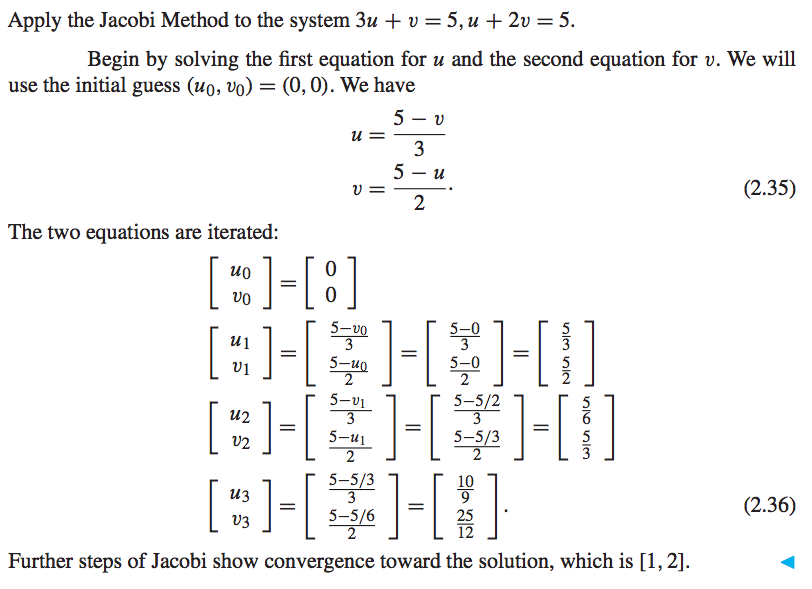

In [1]:
from IPython.display import Image
Image(filename='Images/03_1.png')

The **Jacobi Method** is a form of fixed-point iteration outlined as follows. Consider the linear system $Ax = b$. Then let us define the following three matrices $D, L, U$:
* $D$ denotes the corresponding diagonal matrix of $A$ (including just the diagonal elements of $A$ on its diagonal and all entries above and below the main diagonal being zero), 
* $L$ denotes the corresponding lower triangle matrix of $A$ (including just the elements of $A$ below its diagonal and all entries on and above the main diagonal being zero), and 
* $U$ denotes the corresponding upper triangle matrix of $A$ (including just the elements of $A$ above its diagonal and all entries on and below the main diagonal being zero). 

Then $A = L + D + U$, and the equation to be solved is $Lx + Dx + Ux = b$. Therefore, if all diagonal entries entries of $A$ are nonzero, $x$ solves $Ax = b$ if and only if $x$ solves:

$$x = D^{-1}(b - (L + U)x),$$

where $D^{-1}$ is the matrix of reciprocals of the diagonal entries of $A$. 

The Jacobi Method is just the fixed-point iteration of the last matrix equation:

$$x_0 = \mbox{ initial vector}$$
$$x_{k+1} = D^{-1}(b - (L + U)x_k), \mbox{ for } k = 0, 1, 2, \ldots.$$


The $n \times n$ matrix $A = \{a_{ij}\}$ is called **strictly diagonally dominant** when, for each $1 \leq i \leq n, |a_{ii}| > \sum_{j \neq i} |a_{ij}|$. In other words, when the absolute value of each main diagonal entry dominates the sum of absolute values of the reminder of the entries in its row.

*Theorem*. If the $n \times n$ matrix $A$ is strictly diagonally dominant, then (1) $A$ is a nonsingular matrix and (2), for every vector $b$, the Jacobi Method applied to $Ax = b$ converges to the (unique) solution.

In [2]:
import numpy as np
from numpy.linalg import *

def jacobi(A,b,x0,max_iter,k):
    n = A.shape[0]
    x = x0.copy()
    D = np.diag(A)
    R = A - np.diagflat(D)
    x_prev = x0.copy()
    tol=10**(-k)
    rel_diff = tol * 2
    s=0
    xl=[]
    while s < max_iter: #err > tol and 
        for i in range(0, n):
            x = (b - np.dot(R,x)) / D
            xl.append(x)
        s += 1
        rel_diff = norm(x - x_prev) / norm(x)
        if rel_diff < tol:
            break
        x_prev = x.copy()
    return x,s,xl

def isDiagonallyDominantMatrix(A):
    for i, row in enumerate(A):
        s = sum(abs(v) for j, v in enumerate(row) if i != j)
        if s > abs(row[i]):
            return False
    return True

### <span style="color:#19bfc2">EXAMPLE 2.19</span>

Apply the Jacobi Method to the system $3u + v = 5, u + 2v = 5$.

In [3]:
A = np.array([[3,1],[1,2]])
b = np.array([5,5])

x0 = np.array([0,0])
max_iter=100
k=8

x,i,xl=jacobi(A,b,x0,max_iter,k)
print("The Jacobi Method solution x =",x,"was found in",i,"iterations")

The Jacobi Method solution x = [1. 2.] was found in 12 iterations


### <span style="color:#19bfc2">EXAMPLE 2.20</span>

Apply the Jacobi Method to the system $u + 2v = 5, 3u + v = 5$.

In [4]:
import warnings; warnings.simplefilter('ignore')

A=np.array([[1,2],[3,1]])
b=np.array([5,5])
x0 = np.array([0,0])

XS=[]
for max_iter in range(10,110,10):
    try:
        x,i,xl=jacobi(A,b,x0,max_iter,k)
    except:
        pass
    XS.append((x,max_iter))
for j in XS:
    print("The Jacobi Method solution x =",j[0],"was found in",j[1],"iterations")

The Jacobi Method solution x = [-6.0466175e+07 -1.2093235e+08] was found in 10 iterations
The Jacobi Method solution x = [-3.65615844e+15 -7.31231688e+15] was found in 20 iterations
The Jacobi Method solution x = [-2.21073920e+23 -4.42147839e+23] was found in 30 iterations
The Jacobi Method solution x = [-1.33674945e+31 -2.67349891e+31] was found in 40 iterations
The Jacobi Method solution x = [-8.08281277e+38 -1.61656255e+39] was found in 50 iterations
The Jacobi Method solution x = [-4.8873678e+46 -9.7747356e+46] was found in 60 iterations
The Jacobi Method solution x = [-2.95520441e+54 -5.91040883e+54] was found in 70 iterations
The Jacobi Method solution x = [-1.7868991e+62 -3.5737982e+62] was found in 80 iterations
The Jacobi Method solution x = [-1.08046956e+70 -2.16093911e+70] was found in 90 iterations
The Jacobi Method solution x = [-6.53318624e+77 -1.30663725e+78] was found in 100 iterations


In this case the Jacobi Method fails, as the iteration diverges!

In [5]:
isDiagonallyDominantMatrix(A)

False

### <span style="color:#19bfc2">EXAMPLE 2.21</span>

Determine whether the matrices

$$A = \begin{bmatrix}3&1&-1\\2&-5&2\\1&6&8\end{bmatrix} \mbox{ and } B = \begin{bmatrix}3&2&6\\1&8&1\\9&2&-2\end{bmatrix}$$

are strictly diagonally dominant.

In [6]:
A=np.array([[3,1,-1],[2,-5,2],[1,6,8]])
B=np.array([[3,2,6],[1,8,1],[9,2,-2]])
print("Is A strictly diagonally dominant?",isDiagonallyDominantMatrix(A))
print("Is B strictly diagonally dominant?",isDiagonallyDominantMatrix(B))

Is A strictly diagonally dominant? True
Is B strictly diagonally dominant? False


### 2.5.2 Gauss–Seidel Method and SOR

The **Gauss-Seidell Method** is a variation of the Jacobi Method, in which  equation $(L + D + U)x = b$ is solved iteratively as $(L + D)x_{k+1} = −Ux_k + b$ (instead of $Dx_{k+1} = −(L + U)x_k + b$).

Thus the Gauss-Seidell Method is the following fixed-point iteration:

$$x_0 = \mbox{ initial vector}$$
$$x_{k+1} = (L + D)^{-1}(b - Ux_k) \mbox{ or}$$
$$x_{k+1} = D^{-1}(b - Ux_k - Lx_{k+1}), \mbox{ for } k = 0, 1, 2, \ldots.$$

*Theorem*. If the $n \times n$ matrix $A$ is strictly diagonally dominant, then (1) $A$ is a nonsingular matrix and (2), for every vector $b$, the Gauss-Seidell Method applied to $Ax = b$ converges to the (unique) solution.

In [7]:
from scipy.linalg import solve

def gaussSeidel(A,b,x0,max_iter,k):
    n = A.shape[0]
    x = x0.copy()
    Ld = np.tril(A) # L+D
    U = A - Ld
    xl=[]
    tol=10**(-k)
    rel_diff = tol * 2
    s=0
    while s < max_iter:
        x_new = np.dot(np.linalg.inv(Ld), b - np.dot(U, x))
        xl.append(x_new)
        s+=1
        rel_diff = norm(x_new - x) / norm(x_new)
#         if np.allclose(x, x_new, rtol=tol):
        if rel_diff < tol:
            break
        x = x_new.copy()
    return x,s,xl

### <span style="color:#19bfc2">EXAMPLE 2.22</span>

Solve the following system by Gauss-Seidel:

$$\begin{bmatrix}3&1&-1\\2&4&1\\-1&2&5\end{bmatrix} \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \begin{bmatrix}4\\1\\1\end{bmatrix}$$

In [8]:
A = np.array([[3,1,-1],[2,4,1],[-1,2,5]])
b = np.array([4,1,1])

x0 = np.array([0,0,0])
max_iter=100
k=9

x,i,xl=gaussSeidel(A,b,x0,max_iter,k)
print("The Gauss-Seidel Method solution x =",x,"was found in",i,"iterations")

The Gauss-Seidel Method solution x = [ 2. -1.  1.] was found in 26 iterations


The method called **Successive Over-Relaxation** (**SOR**) takes the Gauss–Seidel direction toward the solution and "overshoots" to try to speed convergence. Let $\omega$ be a real number, and define each component of the new guess $x_{k+1}$ as a weighted average of $\omega$ times the Gauss–Seidel formula and $1 − \omega$ times the current guess $x_k$. The number $\omega$ is called the **relaxation parameter**, $\omega < 1$ is referred to as **under-relaxation**, and $\omega > 1$ is referred to as **over-relaxation**. Clearly, SOR with $\omega = 1$ is exactly Gauss–Seidel.

Notice that now the problem $Ax = b$ or $(L + D + U)x = b$ can be written, upon multiplication by $\omega$ and rearranging, as:

$$x = (D + \omega L)^{-1} [(1 - \omega)Dx - \omega Ux] + \omega (D + \omega L)^{-1}b.$$

Thus, the fixed-point iteration for SOR is:

$$x_0 = \mbox{ initial vector}$$
$$x_{k+1} = (D + \omega L)^{-1} [(1 - \omega)Dx_k - \omega Ux_k] + \omega (D + \omega L)^{-1}b, \mbox{ for } k = 0, 1, 2, \ldots.$$

In [9]:
def SOR(w,A,b,x0,max_iter,k):
    n = A.shape[0]
    x = x0.copy()
    D = np.diagflat(np.diag(A))
    L = np.tril(A) - D 
    Lw = w*L + D 
    U = np.triu(A) - D  #A - L - D
    xl=[]
    tol=10**(-k)
    rel_diff = tol * 2
    s=0
    while s < max_iter:
        x_new = np.dot(np.linalg.inv(Lw), ((1-w)*np.dot(D,x)-w*np.dot(U, x) + w*b))
        xl.append(x_new)
        s+=1
        rel_diff = norm(x_new - x) / norm(x_new)
#         if np.allclose(x, x_new, rtol=tol):
        if rel_diff < tol:
            break
        x = x_new.copy()
    return x,s,xl

### <span style="color:#19bfc2">EXAMPLE 2.23</span>

Apply SOR with $\omega = 1.25$ to the system of Example 2.22.

In [10]:
A = np.array([[3,1,-1],[2,4,1],[-1,2,5]])
b = np.array([4,1,1])

x0 = np.array([0,0,0])
w = 1.25
max_iter=100
k=9

x,i,xl=SOR(w,A,b,x0,max_iter,k)
print("The SOR Method with w =",w, "results the solution x =",x,"in",i,"iterations")

The SOR Method with w = 1.25 results the solution x = [ 2. -1.  1.] in 16 iterations


### <span style="color:#19bfc2">EXAMPLE 2.24</span>

Compare Jacobi, Gauss–Seidel, and SOR on the system of six equations in six unknowns:

$$\begin{bmatrix}3&-1&0&0&0&\frac{1}{2}\\
-1&3&-1&0&\frac{1}{2}&0\\
0&-1&3&-1&0&0\\
0&0&-1&3&-1&0\\
0&\frac{1}{2}&0&-1&3&-1\\
\frac{1}{2}&0&0&0&-1&3\end{bmatrix} 
\begin{bmatrix}x_1\\x_2\\x_3\\x_4\\x_5\\x_6\end{bmatrix} =
\begin{bmatrix}\frac{5}{2}\\\frac{3}{2}\\1\\1\\\frac{3}{2}\\\frac{5}{2}\end{bmatrix}$$

In [11]:
A = np.array([[3,-1,0,0,0,1/2],
[-1,3,-1,0,1/2,0],
[0,-1,3,-1,0,0],
[0,0,-1,3,-1,0],
[0,1/2,0,-1,3,-1],
[1/2,0,0,0,-1,3]])
b = np.array([5/2,3/2,1,1,3/2,5/2])

x0 = np.array([0,0,0,0,0,0])
w = 1.25
max_iter=100
k=9

x,i,xl=jacobi(A,b,x0,max_iter,k)
xlj=[round(i,4) for i in xl[5][:6]]
# print('Jacobi',xl)
x,i,xl=gaussSeidel(A,b,x0,max_iter,k)
xlg=[round(i,4) for i in xl[5][:6]]
# print('Gauss-Seidel',xl)
x,i,xl=SOR(w,A,b,x0,max_iter,k)
xls=[round(i,4) for i in xl[5][:6]]
# print('SOR',xl)

import pandas as pd

df=pd.DataFrame(
    {'Jacobi': xlj,
     'Gauss-Seidel': xlg,
     'SOR': xls
    })
df

,Jacobi,Gauss-Seidel,SOR
0,0.9879,0.9950,1.0053
1,0.9846,0.9946,0.9996
2,0.9674,0.9969,1.0001
3,0.9674,0.9996,0.9995
4,0.9846,1.0016,0.9997
5,0.9879,1.0013,0.9990


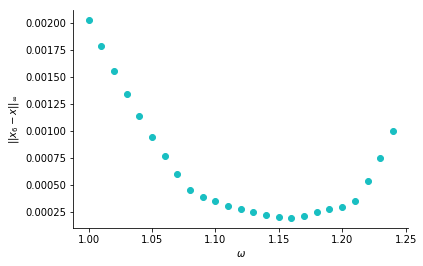

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

r=np.array([1,1,1,1,1,1])
y=[]
x=np.arange(1.,1.25,0.01) 
for w in x:
    _,_,ya=SOR(w,A,b,x0,max_iter,k)
    ya6=ya[6]
    y.append(np.linalg.norm(ya6-r, np.inf))
fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(x,y,'o',color="#19bfc2")
# q=plt.plot(x,i(x),'--',label="$y = x$")
# ax.legend(loc='lower right')
plt.xlabel(r'$\omega$')
yti=r'$||x_6 - x||_\infty$';
plt.ylabel(yti) 
# plt.title(ti)
plt.show();

### 2.5.4 Sparse matrix computations

### <span style="color:#19bfc2">EXAMPLE 2.25</span>

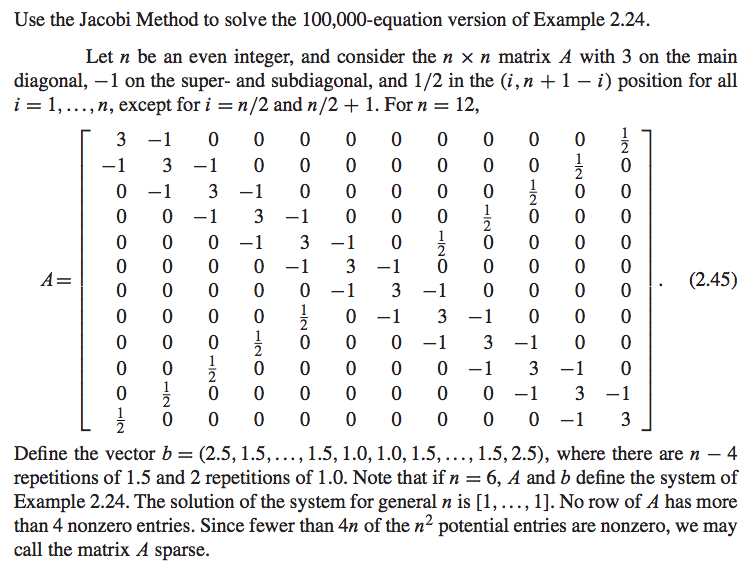

In [13]:
Image(filename='Images/03_2.png')

In [14]:
import scipy.sparse as sp

def sparsetri(n):
    s=(n,n)
    A=np.zeros(s)
    a = np.zeros(s, int)
    np.fill_diagonal(A, 3)
    for i in range(1,len(A)):
        for j in range(len(A)):
            if j==i-1:
                A[i,j]=-1
    for i in range(len(A)-1):
        for j in range(len(A)):
            if j==i+1:
                A[i,j]=-1
    for i in range(len(A)):
        for j in range(1,len(A)):
            if i!=len(A)/2 and i!=len(A)/2-1:
                if j+i==len(A)-1:
                    A[i,j]=0.5
    A[len(A)-1,0]=0.5
    for i in range(len(A)-1):
        A[i,i+1]==-1
    return np.array(A)

def rhs(n):
    b=1.5*np.ones(n)
    b[0]=2.5
    b[-1]=2.5
    m=int(n/2)
    b[m-1]=-1
    b[m]=-1
    return np.array(b)

In [15]:
import time
start_time = time.time()
n=1000
A=sparsetri(n)
b = rhs(n)

x0 = np.zeros(n, int)
max_iter=100
k=6

x,i,xl=jacobi(A,b,x0,max_iter,k)

print("--- %s seconds ---" % (time.time() - start_time))
print(n**3)
print(10**9/2)
print("The Jacobi Method solution x =",x,"was found in",i,"iterations")
# print("The Jacobi Method solution was found in",i,"iterations")

--- 2.7024049758911133 seconds ---
1000000000
500000000.0
The Jacobi Method solution x = [ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
 

In [16]:
x=x.tolist()
c=0
for i in x:
    if i!=1.:
        c+=1
print("For n =",n,"there exist",c,"elements of the Jacobi approximation different than 1")

For n = 1000 there exist 66 elements of the Jacobi approximation different than 1


In [17]:
n=10**5
print("To solve the above system with", n, "equations using the Jacobi Method on a few GHz machine about",int(10**15/((10**8)*86400)),"days would be needed!")

To solve the above system with 100000 equations using the Jacobi Method on a few GHz machine about 115 days would be needed!


## 2.6 Methods for Symmetric Positive-Definite Matrices

### 2.6.1 Symmetric positive-definite matrices

The $n \times n$ matrix $A$ is **symmetric** if it is equal to its trnspose, i.e., $A^T = A$. The matrix A is **positive-definite** if $x^T Ax > 0$, for all vectors $x \neq 0$.

*Property 1*. If the $n \times n$ matrix $A$ is symmetric, then $A$ is positive-definite if and only if all of its eigenvalues are positive.

*Property 2*. We say that a matrix is **full rank** if all rows and columns are linearly independent. If $A$ is $n \times n$ symmetric positive-definite and $X$ is an $n \times m$ matrix of full rank with $n \geq m$, then $X^T AX$ is $m \times m$ symmetric positive-definite.

*Property 3*. A **principal** submatrix of a square matrix $A$ is a square submatrix whose diagonal entries are diagonal entries of $A$. Any principal submatrix of a symmetric positive-definite matrix is symmetric positive-definite.

In [18]:
def isSymmetricMatrix(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def isPositiveDefiniteMatrix(A):
    return np.all(np.linalg.eigvals(A) > 0)

def diagn(A):
    print("A =", "\n",A)
    if isSymmetricMatrix(A):
        print("A is symmetric")
    else:
        print("A is not symmetric")
    if isPositiveDefiniteMatrix(A):
        print("A is positive definite")
    else:
        print("A is not positive definite")
    l,_ = eig(A) 
    print("The eigenvalues of A are:",l,"\n")

### <span style="color:#19bfc2">EXAMPLES 2.26 and 2.27</span>

In [19]:
A = np.array([[2,2],[2,5]])
diagn(A)
A = np.array([[2,4],[4,5]])
diagn(A)
A = np.array([[2,0],[2,2]])
diagn(A)
A = np.array([[0,1],[0,0]])
diagn(A)

A = 
 [[2 2]
 [2 5]]
A is symmetric
A is positive definite
The eigenvalues of A are: [1. 6.] 

A = 
 [[2 4]
 [4 5]]
A is symmetric
A is not positive definite
The eigenvalues of A are: [-0.77200187  7.77200187] 

A = 
 [[2 0]
 [2 2]]
A is not symmetric
A is positive definite
The eigenvalues of A are: [2. 2.] 

A = 
 [[0 1]
 [0 0]]
A is not symmetric
A is not positive definite
The eigenvalues of A are: [0. 0.] 



### 2.6.2 Cholesky factorization

*Theorem*. (**Cholesky Factorization Theorem**.) If $A$ is a symmetric positive-definite $n \times n$ matrix, then there exists an upper triangular $n \times n$ matrix $R$ such that $A = R^T R$.

In [20]:
from scipy.linalg import cholesky

In [21]:
A = np.array([[2,2],[2,5]])

print("For A =","\n",A)
print("The upper triangular matrix R is","\n",cholesky(A, lower=False))

For A = 
 [[2 2]
 [2 5]]
The upper triangular matrix R is 
 [[1.41421356 1.41421356]
 [0.         1.73205081]]


### <span style="color:#19bfc2">EXAMPLE 2.28</span>

Find the Cholesky factorization of 

$$\begin{bmatrix}4&-2&2\\-2&2&-4\\2&-4&11\end{bmatrix}$$

In [22]:
A=np.array([[4,-2,2],[-2,2,-4],[2,-4,11]])
diagn(A)
print("The upper triangular matrix R is","\n",cholesky(A, lower=False))

A = 
 [[ 4 -2  2]
 [-2  2 -4]
 [ 2 -4 11]]
A is symmetric
A is positive definite
The eigenvalues of A are: [13.24888536  3.66882335  0.08229129] 

The upper triangular matrix R is 
 [[ 2. -1.  1.]
 [ 0.  1. -3.]
 [ 0.  0.  1.]]


### 2.6.3 Conjugate Gradient Method

Let $A$ be a symmetric positive-definite $n \times n$ matrix. For two $n$-vectors $v$ and $w$, define the $A$-inner product:

$$(v,w)_A = (v,Aw)$$

where by $(v,w)$ we denote the Euclidean inner product of vectors $v$ and $w$, i.e., $(v,w) = v^T w = \sum_{i=1}^n v_i w_i$. The vectors $v$ and $w$ are called **$A$-conjugate** if: 

$$(v,w)_A = 0$$

i.e., if $v$ and $w$ are **orthogonal** with regards to the $A$-inner product. Moreover, since $A$ is symmetric positive-definite, there exists a set of $n$ mutually $A$-conjugate vectors $P = \{p_1, \ldots, p_{n}\}$ forming a basis of $\mathbb{R}^n$. Such a set $P$ is called sequence of **$A$-conjugate directions**, as we are going to see in the sequel. Therefore, the solution $x_{*}$ of $Ax = b$ can be expressed in this basis as:

$$x_* = \sum_{i=1}^{n} \alpha_i p_i$$

Applying $A$ on all the terms of the previous expression, $b = Ax_* = \sum_{i=1}^{n} \alpha_i Ap_i$ and, after taking the inner product with $p_k$, we get $(p_k,b) = \alpha_k (p_k,p_k)_A$, i.e., 

$$\alpha_k = \frac{(p_k,b)}{||p_k||_A}, \mbox{ for } k = 1, 2, \ldots, n,$$

where $||\cdot||_A$ denotes the norm corresponding to the inner product $(\cdot,\cdot)_A$. Therefore, to solve $Ax = b$ (for $A$ symmetric positive-definite), one just needs to find a sequence of $n$ $A$-conjugate directions, and then compute the $n$ coefficients $\alpha_k$.

On the other hand, to every symmetric positive-definite matrix $A$, there corresponds the following quadratic function $f(x)$:

$$f(x) = \frac{1}{2} (x,x)_A - (x,b), \mbox{ for } x \in \mathbb{R}^n.$$

Clearly, the gradient (first derivative) of this function is:

$$\nabla f(x) = Ax - b$$

and, as the Hessian (second derivative) of $f(x)$ is equal to $A$ (which is positive-definite), the minimum of $f(x)$ is the solution $x_{*}$ of $Ax = b$. 

Now, geometrically the graph of the quadratic $f(x)$ is a paraboloid and starting from any point on the paboloid we can always descend down to its minimum, which is the solution $x_{*}$ of $Ax = b$. According to the **conjugate gradient** (**CG**) method, the minimum of the qudratic $f$ is reached in $n$ steps by successively minimizing this function along each one of the $A$-conjugate directions. In particular, one starts with some guess $x_0$ and searches a direction $d_0$ in order to minimize $f$ along $d_0$, $f(x_1) = f(x_0 + \alpha_0 d_0) = \min$. Subsequently, one needs to find a new direction $d_1$ so that $\min f(x_1 + \alpha_1 d_1)$ also minimizes $f(x_0 + \alpha_0 d_0 + \alpha_1 d_1)$ and so on until the gradient of $f$ becomes very small, in which case the sought solution is reached. 

Thus, the algorithm of the CG iterative scheme $\{\!x_k\!\}$ proceeds as follows:

is such that, starting with some $x_0$ and setting $d_0 = r_0 = b - Ax_0$, we have, for $k = 1, 2, \ldots, n$:

1. Choose any $x_0$, compute $r_0 = Ax_0 - b$, set $d_0 = r_0$
2. For each $k = 0, 1, 2, \ldots, n$, compute:

$$\alpha_k = \frac{||r_k||^2}{||d_k||^2_A}$$

$$r_{k+1} = r_k - \alpha_k Ad_k$$

$$\beta_k = \frac{||r_{k+1}||^2}{||r_k||^2}$$

$$x_{k+1} = x_k + \alpha_k d_k$$

$$d_{k+1} = r_{k+1} + \beta_k d_k$$

3. Terminate when $||r_k||^2$ is sufficiently small.

In [23]:
from scipy.sparse.linalg import cg, spsolve, lobpcg

def conjugateGrad(A, b, x):  #xx=np.array([])):  
    n = len(b)
#     if len(xx)==0:
#         x = np.zeros(n) #, dtype=complex)
#     else:
#         x=xx
    print("i = 0","x =",x)
    print("i = 0","r =",b)
    r = np.dot(A, x) - b
    p = - r
    r_k_norm = np.dot(r, r)
    for i in range(n):  #2*
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        print("i =",i,"a =",alpha,'\n')
        x += alpha * p
        print("i =",i+1,"x =",x)
        r += alpha * Ap
        print("i =",i+1,"r =",-r)
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-5:
#             print('Iteration:', i+1)
            break
        p = beta * p - r
    print(" ")
    print("The solution is",x)
#     return x

def conjugateGrad_s(A, b, x):
    n = len(b)
    X={}
    X[0]=x  #np.zeros(n, dtype=complex)
#     if not x:
#         x = np.zeros(n, dtype=complex) #ones
# #         X[0]=x
    r = np.dot(A, x) - b
    p = - r
    r_k_norm = np.dot(r, r)
    for i in range(n):  #2*
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        X[i]=x
        r += alpha * Ap
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-5:
            X[i]=x
            break
        p = beta * p - r
    return x,X

### <span style="color:#19bfc2">EXAMPLE 2.29</span>

Using the Conjugate Gradient Method solve the system:

$$\begin{bmatrix}2&2\\2&5\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}6\\3\end{bmatrix}$$

In [24]:
A = np.array([[2,2],[2,5]])
b = np.array([6,3])

x=np.array([0,0],dtype=float)
conjugateGrad(A, b, x)  

i = 0 x = [0. 0.]
i = 0 r = [6 3]
i = 0 a = 0.23809523809523808 

i = 1 x = [1.42857143 0.71428571]
i = 1 r = [ 1.71428571 -3.42857143]
i = 1 a = 0.6999999999999998 

i = 2 x = [ 4. -1.]
i = 2 r = [1.77635684e-15 1.77635684e-15]
 
The solution is [ 4. -1.]


In [25]:
x=np.array([2,4],dtype=float)
conjugateGrad(A, b, x)  

i = 0 x = [2. 4.]
i = 0 r = [6 3]
i = 0 a = 0.1715210355987055 

i = 1 x = [0.97087379 0.39805825]
i = 1 r = [ 3.26213592 -0.93203883]
i = 1 a = 0.9716981132075473 

i = 2 x = [ 4. -1.]
i = 2 r = [-8.88178420e-16 -9.99200722e-16]
 
The solution is [ 4. -1.]


In [26]:
import numpy.linalg as la
import scipy.optimize as sopt

def phi(xvec):
    x, y = xvec
    return 0.5*(A[0,0]*x*x + 2*A[1,0]*x*y +  A[1,1]*y*y) - x*b[0] - y*b[1]

def dphi(xvec):
    x, y = xvec
    return np.array([
            A[0,0]*x + A[0,1]*y - b[0],
            A[1,0]*x + A[1,1]*y - b[1]
        ])

In [34]:
A = np.array([[2,2],[2,5]])
b = np.array([6,3])

x0 = np.array([2,4])

iterates = [x0]
gradients = [dphi(x0)]
directions = [-dphi(x0)]

The minimum value of the quadratic function is -10.5


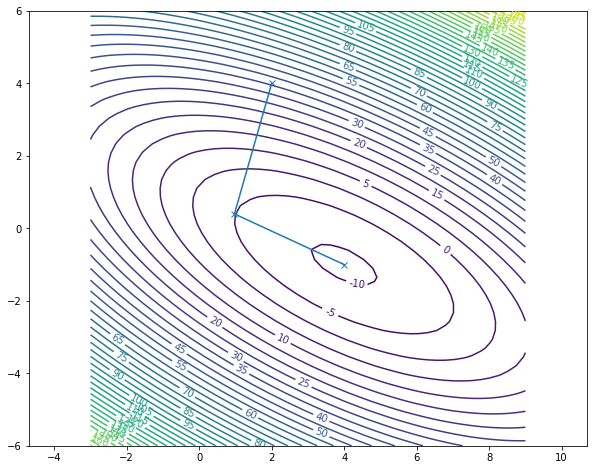

In [36]:
%matplotlib inline

x = iterates[-1]
s = directions[-1]

def f1d(alpha):
    return phi(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_x = x + alpha_opt*s

g = dphi(next_x)
last_g = gradients[-1]
gradients.append(g)

beta = np.dot(g, g)/np.dot(last_g, last_g)
directions.append(-g + beta*directions[-1])

print("The minimum value of the quadratic function is",phi(next_x))

iterates.append(next_x)

# plot function and iterates
fig = plt.figure(figsize=(10,8))
plt.axis("equal");
xmesh, ymesh = np.mgrid[-3:9:50j,-6:6:50j];
phimesh = phi(np.array([xmesh, ymesh]));
cp=plt.contour(xmesh, ymesh, phimesh, 50);
plt.clabel(cp, inline=1, fmt = '%1.0f', fontsize=10);
it_array = np.array(iterates);
plt.plot(it_array.T[0], it_array.T[1], "x-");

### 2.6.4 Preconditioning

The preconditioned form of the $n \times n$ linear system $Ax = b$ is: 

$$M^{−1}Ax = M^{−1}b$$

where $M$ is an invertible $n \times n$ matrix called the **preconditioner**. The following are special cases of preconditioning:

* The **Jacobi preconditioner** is $M = D$, where $D$ is the diagonal of $A$. 

* When $A$ is a symmetric positive-definite $n \times n$ matrix, we will choose a symmetric positive-definite matrix $M$ for use as a preconditioner. The **Preconditioned Conjugate Gradient Method** is now easy to describe: Replace $Ax = b$ with the preconditioned equation $M^{−1}Ax = M^{−1}b$, and replace the Euclidean inner product with $(v,w)_M$.

* The **symmetric successive over-relaxation (SSOR) preconditioner** is defined by: $M = (D + \omega L)D^{−1}(D + \omega U)$, where $A = L + D + U$ is divided into its lower triangular part, diagonal, and upper triangular part. As in the SOR method, $\omega$ is a constant between 0 and 2. The special case $\omega = 1$ is called the **Gauss–Seidel preconditioner**.

### <span style="color:#19bfc2">EXAMPLE 2.31</span>

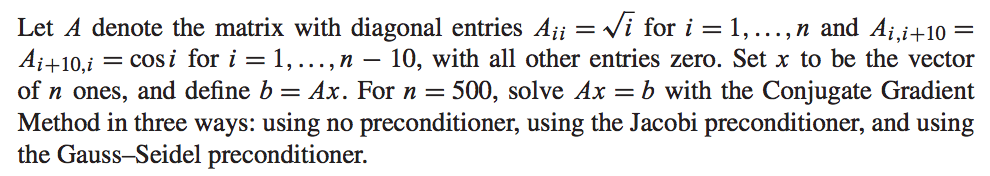

In [29]:
Image(filename='Images/03_3.png')

In [30]:
import cmath

n = 500
s=(n,n)
A=np.zeros(s, dtype=complex)
m=cmath.sqrt(1j)
np.fill_diagonal(A, cmath.sqrt(m))
for i in range(1,n-10):
    A[i,i+10]=cmath.cos(i)
    A[i+10,i]=cmath.cos(i)
n_ones=np.ones(n,dtype=complex)
b=np.dot(A,n_ones)

#### (1) No preconditioner

In [31]:
x=np.zeros(n,dtype=complex)
x=conjugateGrad_s(A, b, x)[0]
X=n_ones
r=x-X
r_norm=np.linalg.norm(r)  
print("Error of CGM without preconditioner =",r_norm)

Error of CGM without preconditioner = 5.794773680292567


#### (2) Jacobi preconditioner

In [32]:
M1=np.diagflat(np.diag(A))
MiA=np.dot(np.linalg.inv(M1),A)
Mib=np.dot(np.linalg.inv(M1),b)

x=np.zeros(n,dtype=complex)
x=conjugateGrad_s(MiA, Mib, x)[0]
r=x-X
r_norm=np.linalg.norm(r)  
print("Error of CGM with Jacobi preconditioner =",r_norm)

Error of CGM with Jacobi preconditioner = 5.794773680292568


#### (3) Gauss-Seidel preconditioner

In [33]:
D=np.diagflat(np.diag(A))
L=np.tril(A)
U=np.triu(A)
M2=np.dot(np.dot(L,np.linalg.inv(D)),np.transpose(U))
MiA=np.dot(np.linalg.inv(M2),A)
Mib=np.dot(np.linalg.inv(M2),b)

x=np.zeros(n,dtype=complex)
x=conjugateGrad_s(MiA, Mib, x)[0]
r=x-X
r_norm=np.linalg.norm(r)  
print("Error of CGM with Gauss-Seidel preconditioner =",r_norm)

Error of CGM with Gauss-Seidel preconditioner = 117.44253946509976
